## Array Implementation of Binary Trees

To avoid the cost of all the shifts in memory that we get from using Arrays, it is useful to implement Binary Trees with pointers from one element to the next, just like Binary Trees are implemented before this point, especially when the Binary Tree is modified often.

But in case we read from the Binary Tree a lot more than we modify it, an Array implementation of a Binary Tree can make sense as it needs less memory, it can be easier to implement, and it can be faster for certain operations due to cache locality.

Cache Locality is when the fast cache memory in the computer stores parts of memory that was recently accessed, or when the cache stores parts of memory that is close to the address that is currently accessed. This happens because it is likely that the CPU needs something in the next cycle that is close to what it used in the previous cycle, either close in time or close in space.

Since Array elements are stored contiguously in memory, one element right after the other, computers are sometimes faster when reading from Arrays because the next element is already cached, available for fast access in case the CPU needs it in the next cycle.

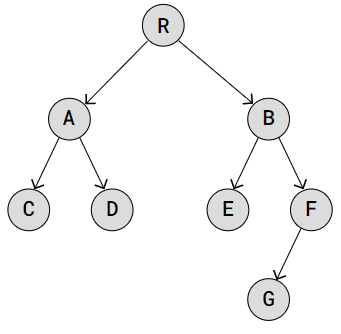

This Binary Tree can be stored in an Array starting with the root node R on index 0. The rest of the tree can be built by taking a node stored on index i, and storing its left child node on index 2⋅i+1, and its right child node on index 2⋅i+2.

In [1]:
binary_tree_array = ['R', 'A', 'B', 'C', 'D', 'E', 'F', None, None, None, None, None, None, 'G']

def left_child_index(index):
    return 2 * index + 1

def right_child_index(index):
    return 2 * index + 2

def get_data(index):
    if 0 <= index < len(binary_tree_array):
        return binary_tree_array[index]
    return None

right_child = right_child_index(0)
left_child_of_right_child = left_child_index(right_child)
data = get_data(left_child_of_right_child)

print("root.right.left.data:", data)

root.right.left.data: E


In this Array implementation, since the Binary Tree nodes are placed in an array, much of the code is about accessing nodes using indexes, and about how to find the correct indexes.

Let's say we want to find the left and right child nodes of node B. Because B is on index 2, B's left child is on index 2⋅2+1=5, which is node E, right? And B's right child is on index 2⋅2+2=6, which is node F, and that also fits with the drawing above, right?

As you can see on line 1, this implementation requires empty array elements where nodes have no child nodes. So to avoid wasting space on empty Array elements, Binary Trees stored using Array implementation should be a "perfect" Binary Tree, or a nearly perfect one.

A perfect Binary Tree is when every internal node have exactly two child nodes, and all leaf nodes are on the same level.

If we remove the G node in the Binary Tree above, it looks like this:

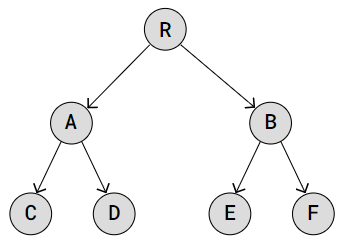

And the first line in the code above can be written without wasting space on empty Array elements:

binary_tree_array = ['R', 'A', 'B', 'C', 'D', 'E', 'F']

This is how the three different DFS traversals can be done on an Array implementation of a Binary Tree.

In [2]:
binary_tree_array = ['R', 'A', 'B', 'C', 'D', 'E', 'F', None, None, None, None, None, None, 'G']

def left_child_index(index):
    return 2 * index + 1

def right_child_index(index):
    return 2 * index + 2

def pre_order(index):
    if index >= len(binary_tree_array) or binary_tree_array[index] is None:
        return []
    return [binary_tree_array[index]] + pre_order(left_child_index(index)) + pre_order(right_child_index(index))

def in_order(index):
    if index >= len(binary_tree_array) or binary_tree_array[index] is None:
        return []
    return in_order(left_child_index(index)) + [binary_tree_array[index]] + in_order(right_child_index(index))

def post_order(index):
    if index >= len(binary_tree_array) or binary_tree_array[index] is None:
        return []
    return post_order(left_child_index(index)) + post_order(right_child_index(index)) + [binary_tree_array[index]]

print("Pre-order Traversal:", pre_order(0))
print("In-order Traversal:", in_order(0))
print("Post-order Traversal:", post_order(0))

Pre-order Traversal: ['R', 'A', 'C', 'D', 'B', 'E', 'F', 'G']
In-order Traversal: ['C', 'A', 'D', 'R', 'E', 'B', 'G', 'F']
Post-order Traversal: ['C', 'D', 'A', 'E', 'G', 'F', 'B', 'R']
